In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image


In [5]:
with np.load('/content/mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
    y_test = data['y_test']
    y_train = data['y_train']

In [7]:
x_train, x_test = x_train/255.0, x_test/255.0

In [8]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28,28)),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 84ms/step - accuracy: 0.3771 - loss: 1.6545 - val_accuracy: 0.7915 - val_loss: 0.6267
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 148s 79ms/step - accuracy: 0.8420 - loss: 0.4944 - val_accuracy: 0.9155 - val_loss: 0.2547
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 78ms/step - accuracy: 0.9152 - loss: 0.2747 - val_accuracy: 0.9487 - val_loss: 0.1673


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


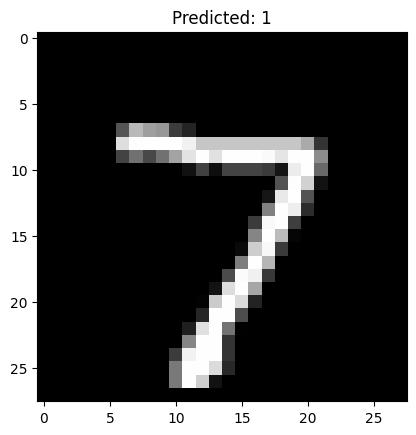

Predicted: 1


In [10]:
def predict_img(img_array):
    img_array = img_array.reshape(1,28,28)/255.0
    return np.argmax(model.predict(img_array))


sample = x_test[0]
pred = predict_img(sample)
plt.imshow(sample, cmap='gray')
plt.title(f"Predicted: {pred}")
plt.show()
print("Predicted:", pred)

model.save('mnist_lstm.h5')
model = load_model('mnist_lstm.h5')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


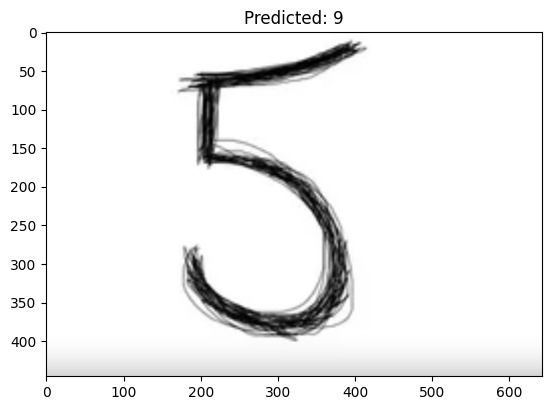

Predicted: 9


In [11]:
def predict_file(path):
    img = image.load_img(path, target_size=(28,28), color_mode='grayscale')
    arr = np.array(img)/255.0
    return np.argmax(model.predict(arr.reshape(1,28,28)))

pred_file = predict_file('five.jpg')
plt.imshow(Image.open('five.jpg'), cmap='gray')
plt.title(f"Predicted: {pred_file}")
plt.show()
print("Predicted:", pred_file)